In [2]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt
sns.set_theme(style='whitegrid', palette='Set2')
plt.rcParams['figure.dpi'] = 150
titanic = pd.read_csv('../day2/titanic_clean.csv')
temp = pd.read_csv('../day2/GlobalTemperatures_clean.csv')

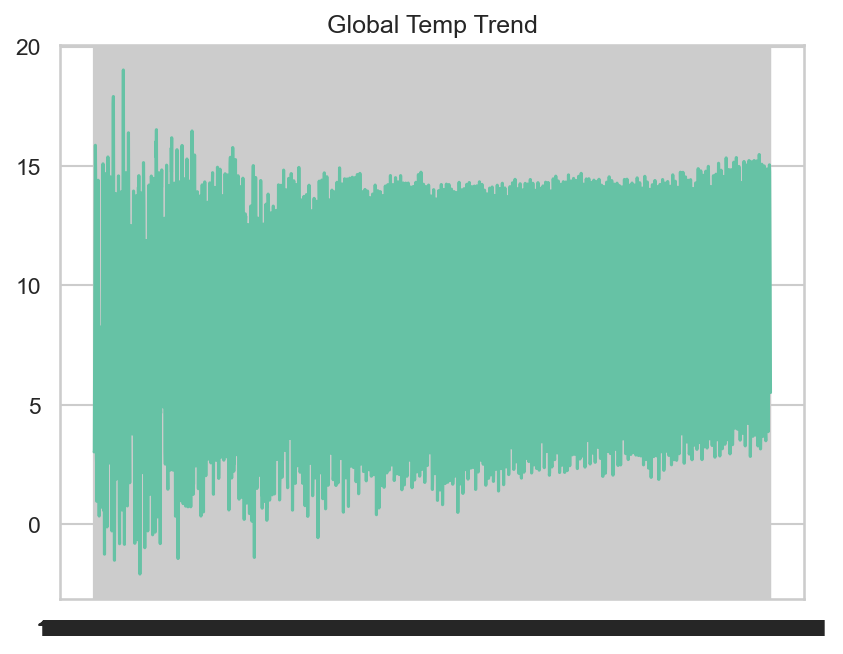

In [16]:
plt.plot(temp['dt'], temp['LandAverageTemperature']); 
plt.title('Global Temp Trend')
plt.savefig('./figures/mpl_{}.png'.format(1), bbox_inches='tight')

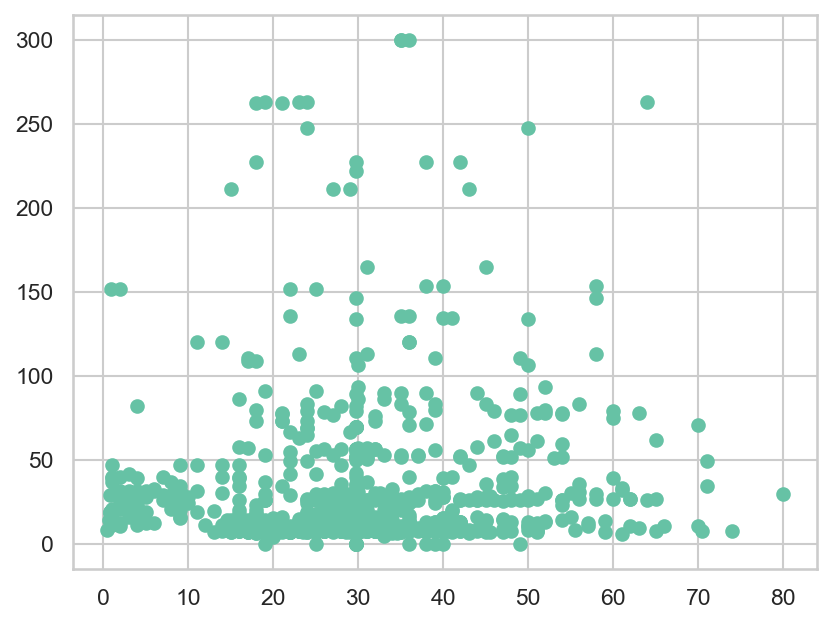

In [17]:
plt.scatter(titanic['age'], titanic['fare'])
plt.savefig('./figures/mpl_{}.png'.format(2), bbox_inches='tight')

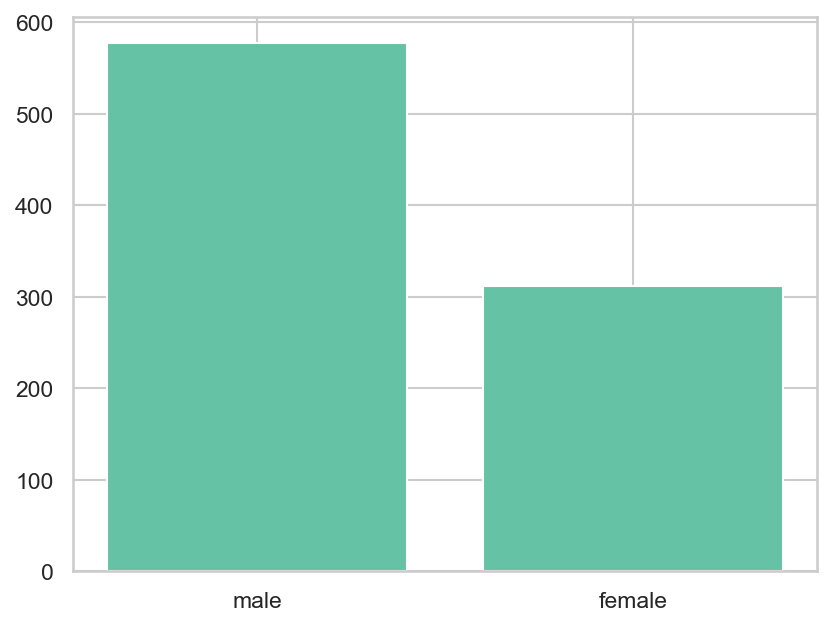

In [18]:
sex_counts = titanic['sex'].value_counts(); plt.bar(sex_counts.index, sex_counts.values)
plt.savefig('./figures/mpl_{}.png'.format(3), bbox_inches='tight')

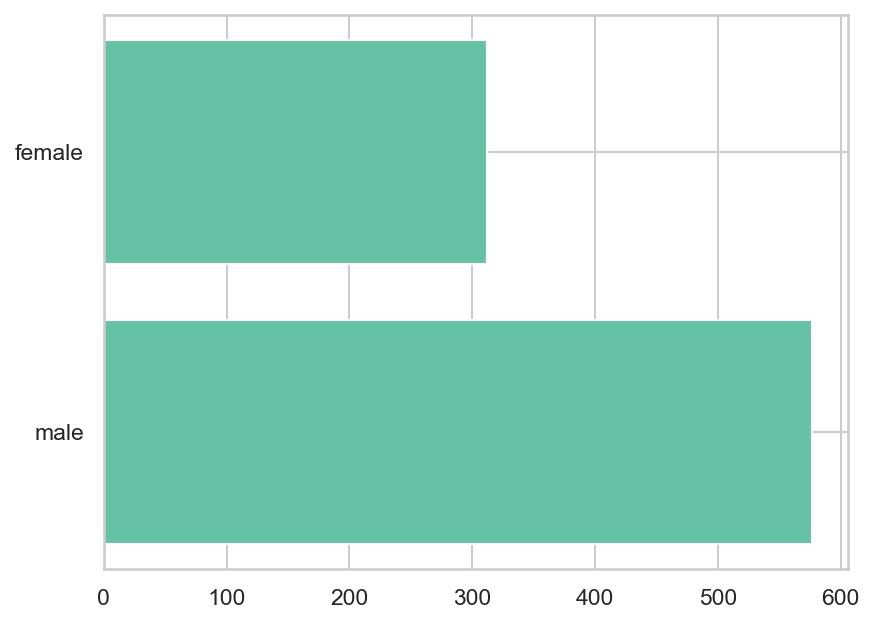

In [19]:
plt.barh(sex_counts.index, sex_counts.values)
plt.savefig('./figures/mpl_{}.png'.format(4), bbox_inches='tight')

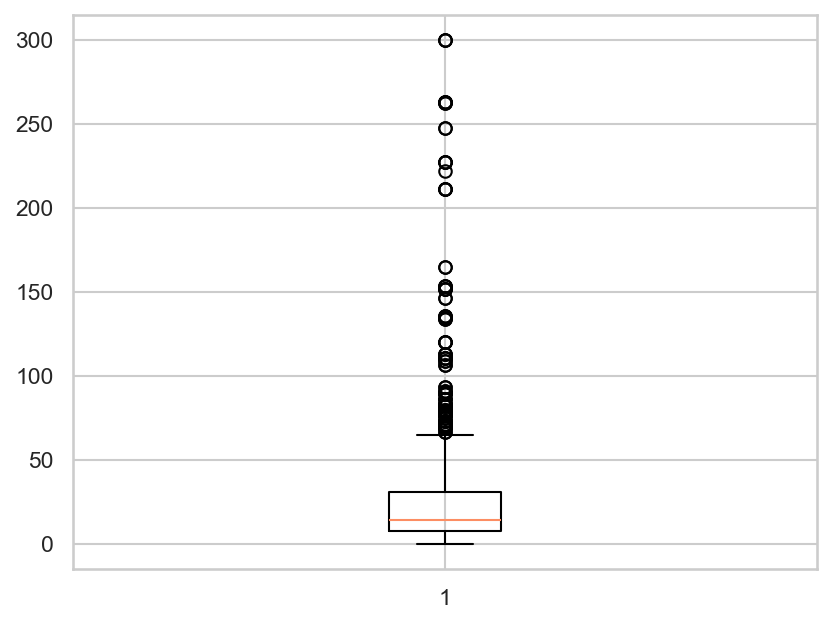

In [20]:
plt.boxplot(titanic['fare'])
plt.savefig('./figures/mpl_{}.png'.format(5), bbox_inches='tight')

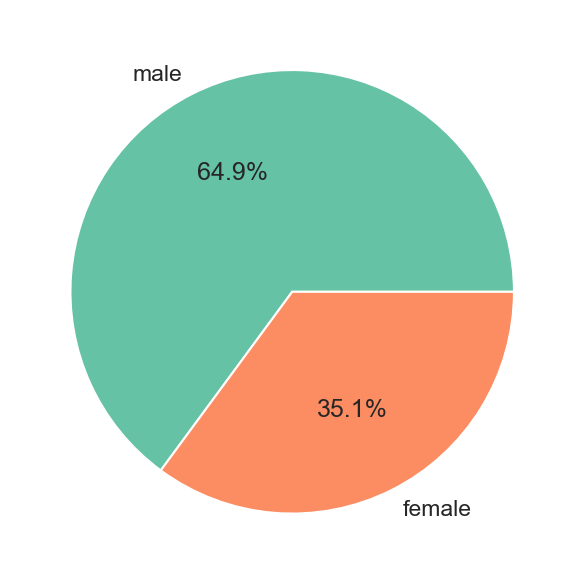

In [21]:
plt.pie(sex_counts.values, labels=sex_counts.index, autopct='%1.1f%%')
plt.savefig('./figures/mpl_{}.png'.format(6), bbox_inches='tight')

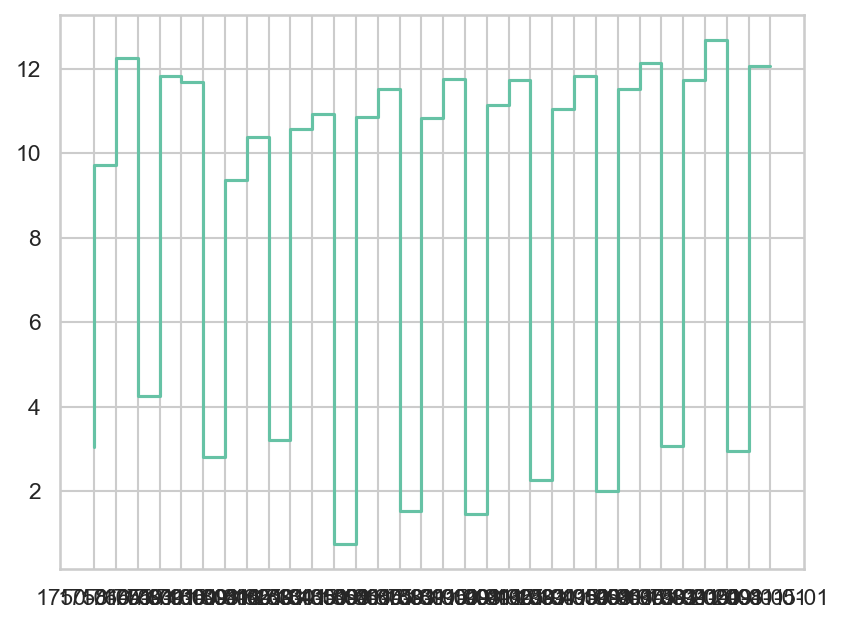

In [22]:
plt.step(temp['dt'][::100], temp['LandAverageTemperature'][::100])
plt.savefig('./figures/mpl_{}.png'.format(7), bbox_inches='tight')

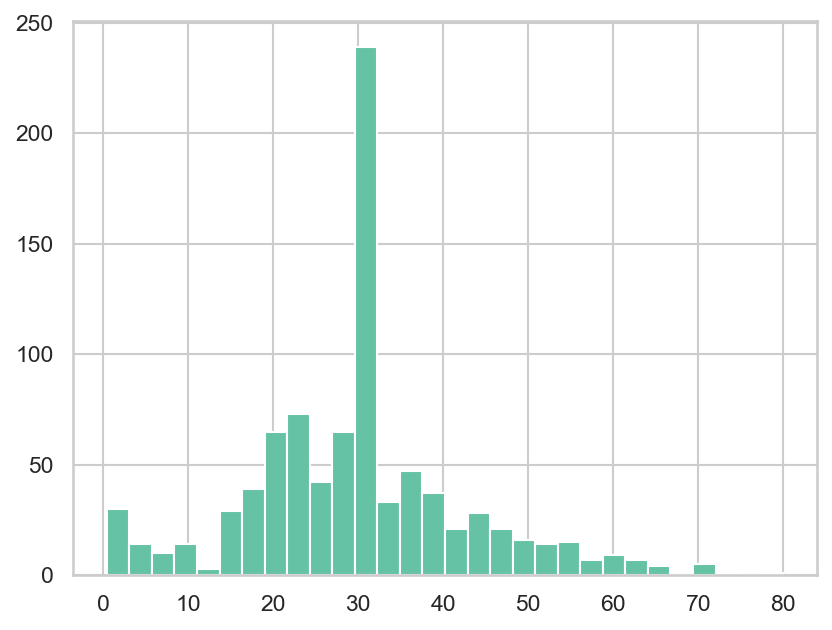

In [23]:
plt.hist(titanic['age'], bins=30)
plt.savefig('./figures/mpl_{}.png'.format(8), bbox_inches='tight')

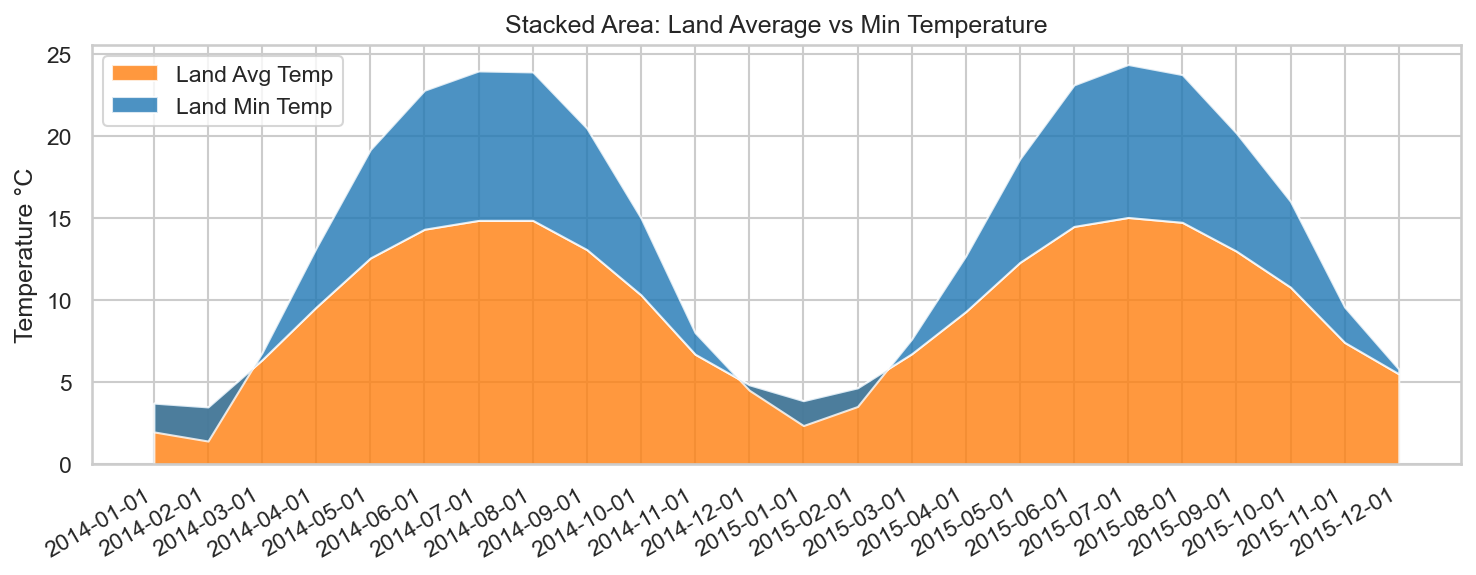

In [25]:
# 2. 只取最近 24 个月做演示（图更清爽）
sample = temp.tail(24)

# 3. 取出两列温度
land_avg   = sample['LandAverageTemperature'].values
land_min   = sample['LandMinTemperature'].values
x          = sample['dt']

# 4. 画堆叠面积图
fig, ax = plt.subplots(figsize=(10,4))
ax.stackplot(x,
             land_avg,
             land_min,
             labels=['Land Avg Temp', 'Land Min Temp'],
             colors=['#ff7f0e', '#1f77b4'],
             alpha=0.8)
ax.legend(loc='upper left')
ax.set_title('Stacked Area: Land Average vs Min Temperature')
ax.set_ylabel('Temperature °C')
fig.autofmt_xdate()          # 让 x 轴日期倾斜
plt.tight_layout()
plt.savefig('./figures/mpl_{}.png'.format(9), bbox_inches='tight')

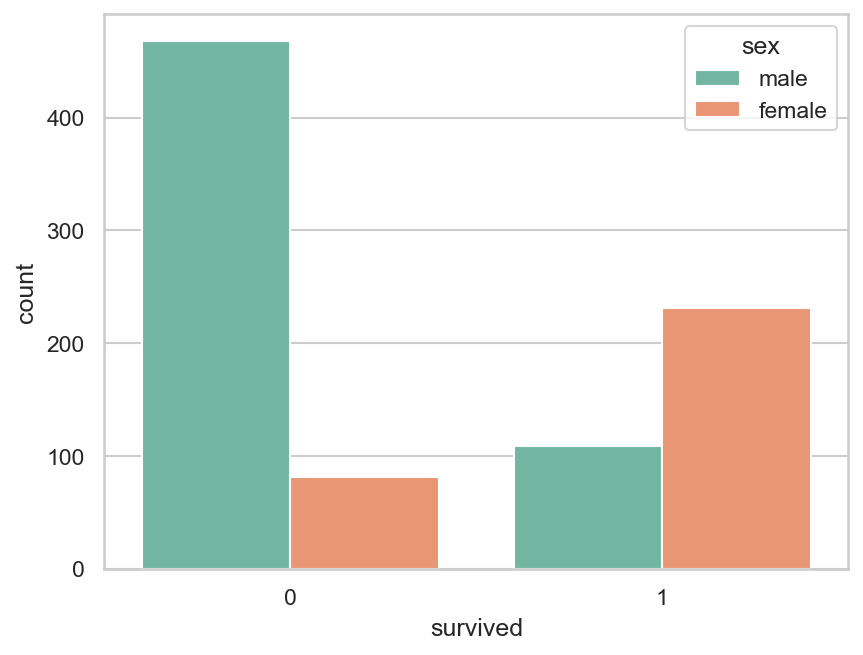

In [27]:
sns.countplot(data=titanic, x='survived', hue='sex')
plt.savefig('./figures/sns_{}.png'.format(1))

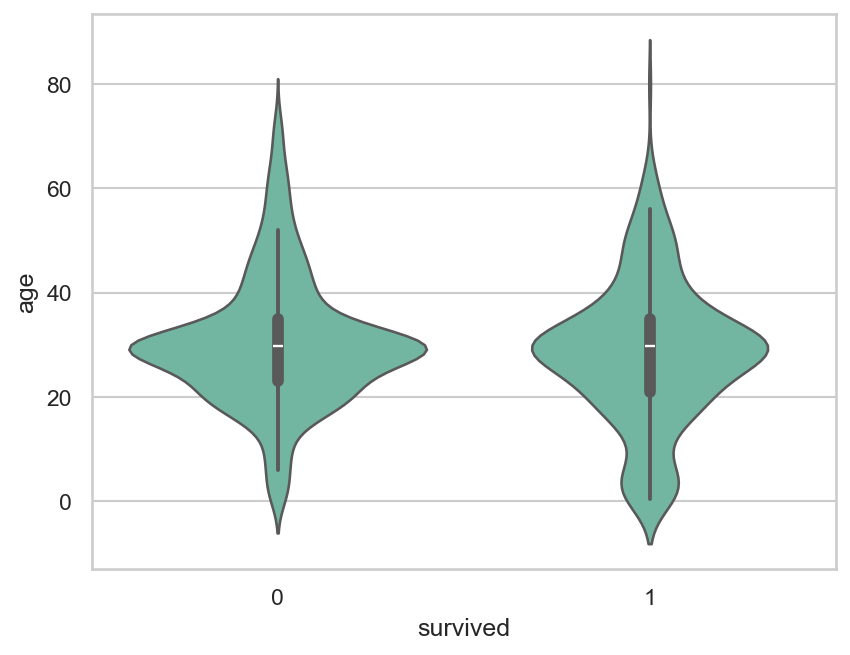

In [32]:
sns.violinplot(data=titanic, x='survived', y='age')
plt.savefig('./figures/sns_{}.png'.format(2))

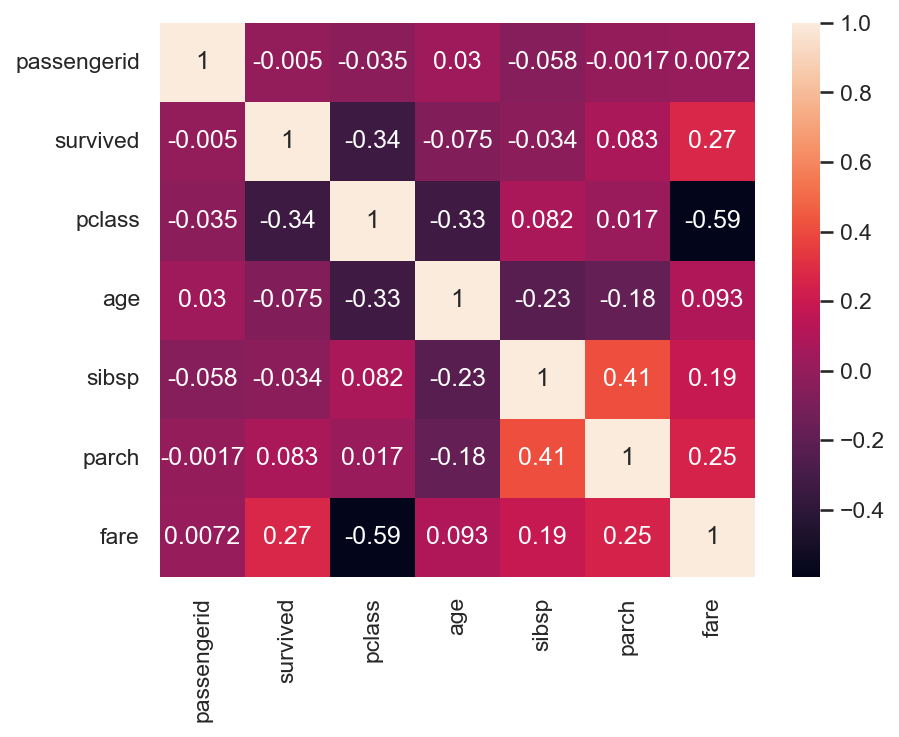

In [33]:
sns.heatmap(titanic.corr(numeric_only=True), annot=True)
plt.savefig('./figures/sns_{}.png'.format(3))

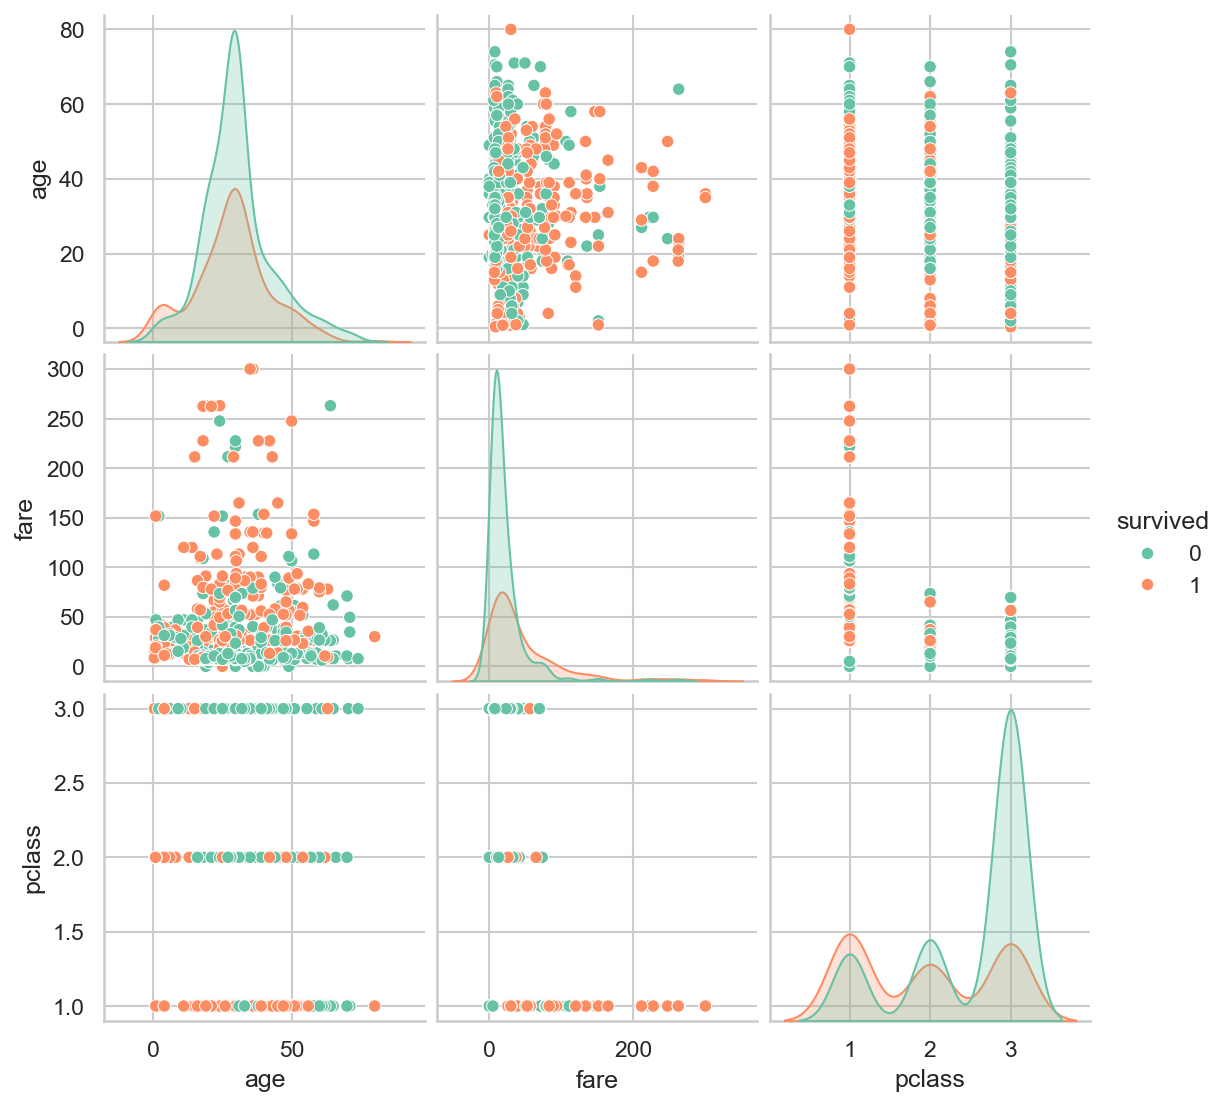

In [34]:
sns.pairplot(titanic[['age','fare','pclass','survived']], hue='survived')
plt.savefig('./figures/sns_{}.png'.format(4))

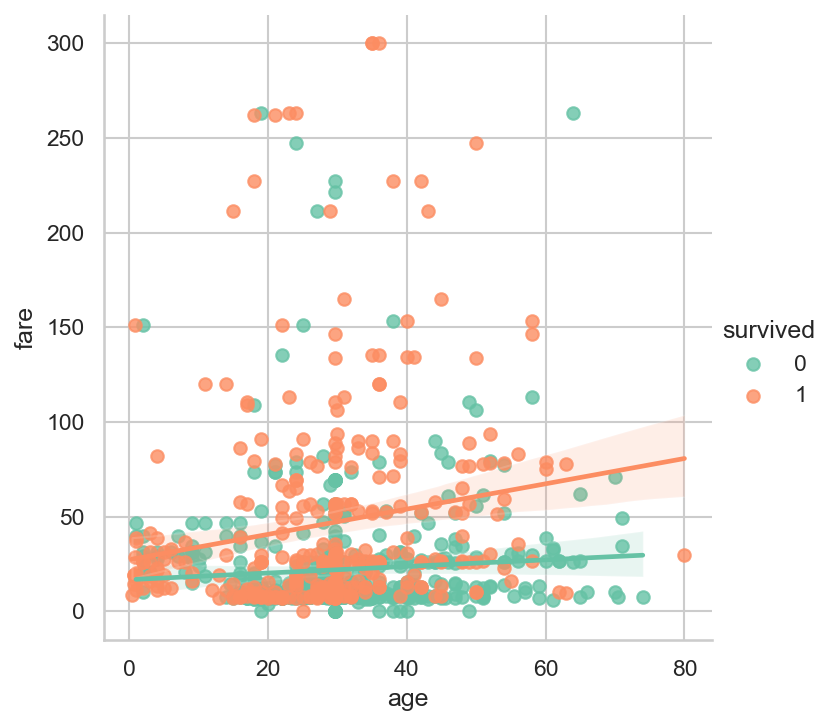

In [35]:
sns.lmplot(data=titanic, x='age', y='fare', hue='survived')
plt.savefig('./figures/sns_{}.png'.format(5))

小结
Matplotlib：Python 最底层的“画图引擎”，一切皆可画，但代码长、样式原始。
Seaborn：基于 Matplotlib 的“高级美颜封装”，几行代码就能出漂亮、带统计信息的图。

热力图这里采用的是皮尔逊相关系数。

小提琴图（Violin Plot）= 箱线图 + 核密度估计曲线 的“合体版”。
箱线图只能告诉你 5 个数字 + 离群点；
小提琴图还能告诉你 整个分布形状：
单峰还是双峰？
长尾在哪边？
哪里样本最密集？